In [1]:
from pathlib import Path

SED_HOME = Path.home().joinpath('Documents').joinpath('sed')
CDPP_DIR = SED_HOME.joinpath('CDPP')
CDPP_EXAMPLES = CDPP_DIR.joinpath('examples')
CDPP_SRC = CDPP_DIR.joinpath('src')
CDPP_SCRIPTS = CDPP_DIR.joinpath('scripts')
BASE_BIN = CDPP_SRC.joinpath('bin')
CDPP_ATOMICS = CDPP_SRC.joinpath('cd++/atomics')

In [2]:
%%bash -s "$CDPP_EXAMPLES"

cd $1/dc-sed-tp1-2022/model/

cat top.ma

[top]
components : router@router barrier@barrier manager@manager queue@queue transducer@transducer gate1@gate gate2@gate gate3@gate gate4@gate gate5@gate gate6@gate gate7@gate gate8@gate gate9@gate gate10@gate
out : out

link : out@router in@queue
link : outId@router arrived@transducer
link : out@queue in@barrier
link : throughput@transducer in@manager

link : done@barrier done@queue
link : done@barrier solved@transducer

link : out1@barrier fromBarrier@gate1
link : out2@barrier fromBarrier@gate2
link : out3@barrier fromBarrier@gate3
link : out4@barrier fromBarrier@gate4
link : out5@barrier fromBarrier@gate5
link : out6@barrier fromBarrier@gate6
link : out7@barrier fromBarrier@gate7
link : out8@barrier fromBarrier@gate8
link : out9@barrier fromBarrier@gate9
link : out10@barrier fromBarrier@gate10

link : toBarrier@gate1 done1@barrier
link : toBarrier@gate2 done2@barrier
link : toBarrier@gate3 done3@barrier
link : toBarrier@gate4 done4@barrier
link : toBarrier@gate5 done5@barrier
link :

In [3]:
%%bash -s "$CDPP_EXAMPLES"

cd $1/dc-sed-tp1-2022/src/

bin/cd++ -m ../model/top.ma  \
         -l ../top.log \
         -o ../top.out \
         -t 240:00:00:00

PCD++: A Tool to Implement n-Dimensional Cell-DEVS models
Version 3.0 - March 2003
Troccoli A., Rodriguez D., Wainer G., Barylko A., Beyoglonian J., Lopez A.
-----------------------------------------------------------------------------
PCD++ Extended States: An extended and improved version of CD++ for Cell-DEVS
Version 4.1.2 - December 2018
Santi L., Castro, R., Pimás, J.
-----------------------------------------------------------------------------
Discrete Event Simulation Lab
Departamento de Computación
Facultad de Ciencias Exactas y Naturales
Universidad de Buenos Aires, Argentina
-----------------------------------------------------------------------------
Compiled for standalone simulation


Loading models from ../model/top.ma
Loading events from 
Running parallel simulation. Reading models partition from 
Model partition details output to: /dev/null*
Message log: ../top.log
Output to: ../top.out
Tolerance set to: 1e-08
Configuration to show real numbers: Width = 12 - Precision =

# Resultados

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# definimos los path a los archivos de interés
OUT_FILENAME = str(CDPP_EXAMPLES)+"/dc-sed-tp1-2022/top.out"

# definimos los nombres de las columnas en los dataframes de pandas
TIME_COL = 'time'
PORT_COL = 'port'
VALUE_COL = 'value'

# conversion a floar
def parse_value(value: str):
    is_list = value.strip().startswith("[") and value.strip().endswith("]")
    if is_list:
        return tuple(float(num) for num in value.replace('[', '').replace(']', '').split(', '))
    return float(value)

# conversion VTime a float
def time_to_secs(time):
    h, m, s, ms, r = time.split(':')
    return float(h)*60*60. + float(m)*60. + float(s) + float(ms)/1000. + float(r)/1000.

In [5]:
df_converters = {
    VALUE_COL: parse_value,
    TIME_COL: time_to_secs
}

salida = pd.read_csv(OUT_FILENAME,
                     delimiter=r'(?<!,)\s+',
                     engine='python',  # C engine doesnt work for regex
                     # Se puede usar esto para convertir los valores directamente:
                     converters=df_converters,
                     names=[TIME_COL, PORT_COL, VALUE_COL]
                    )
salida

,time,port,value
0,37685.669791,out,"(0.0, 35920.6, 35921.6, 37685.7, 58.0, 47.0, 5..."
1,39042.726895,out,"(2.0, 37517.7, 37518.7, 39042.7, 52.0, 65.0, 5..."
2,39083.052884,out,"(1.0, 37430.4, 37431.4, 39083.1, 49.0, 50.0, 5..."
3,39720.205586,out,"(3.0, 37940.6, 37941.6, 39720.2, 60.0, 53.0, 4..."
4,39830.025520,out,"(4.0, 38484.9, 38485.9, 39830.0, 51.0, 50.0, 4..."
...,...,...,...
170,68303.522702,out,"(170.0, 66801.5, 66802.5, 68303.5, 51.0, 50.0,..."
171,69262.372763,out,"(172.0, 68302.9, 68303.9, 69262.4, 39.0, 34.0,..."
172,69781.188853,out,"(171.0, 68037.6, 68038.6, 69781.2, 61.0, 37.0,..."
173,70546.182873,out,"(173.0, 69262.0, 69263.0, 70546.2, 50.0, 54.0,..."


In [6]:
salida[['route_id', 'arrival_date', 'assigned_date', 'exit_date', 'count_A', 'count_B', 'count_C']] = pd.DataFrame(salida['value'].tolist(), index=salida.index)
salida = salida.drop(['value'], axis=1)
salida

,time,port,route_id,arrival_date,assigned_date,exit_date,count_A,count_B,count_C
0,37685.669791,out,0.0,35920.6,35921.6,37685.7,58.0,47.0,52.0
1,39042.726895,out,2.0,37517.7,37518.7,39042.7,52.0,65.0,51.0
2,39083.052884,out,1.0,37430.4,37431.4,39083.1,49.0,50.0,59.0
3,39720.205586,out,3.0,37940.6,37941.6,39720.2,60.0,53.0,43.0
4,39830.025520,out,4.0,38484.9,38485.9,39830.0,51.0,50.0,47.0
...,...,...,...,...,...,...,...,...,...
170,68303.522702,out,170.0,66801.5,66802.5,68303.5,51.0,50.0,61.0
171,69262.372763,out,172.0,68302.9,68303.9,69262.4,39.0,34.0,49.0
172,69781.188853,out,171.0,68037.6,68038.6,69781.2,61.0,37.0,48.0
173,70546.182873,out,173.0,69262.0,69263.0,70546.2,50.0,54.0,51.0


<AxesSubplot:xlabel='arrival_date'>

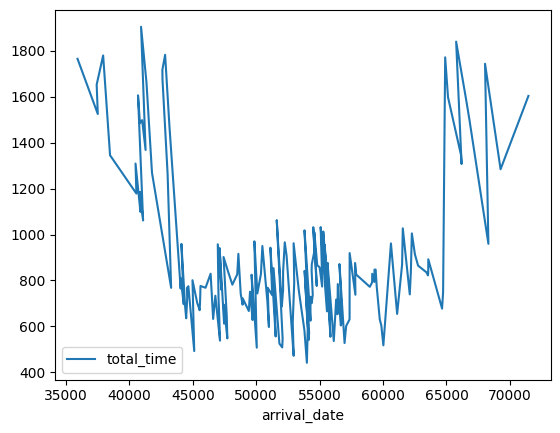

In [7]:
salida['total_time'] = salida['exit_date'] - salida['arrival_date']
salida.plot(x='arrival_date', y='total_time')